In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Starting of by importing preprocessed data

In [2]:
data = pd.read_csv(r"C:\Users\48660\Desktop\Development Workshop\ratings\valid_patients_data.csv")

In [3]:
print(data.shape)
data.head()

(18620, 14)


,trials.thisTrialN,trials.thisN,trials.thisIndex,text_4.started,image.started,mouse.started,Valence.started,Valence_rating.response,Valence_rating.rt,Valence_rating.started,Arousal.started,Arousal_rating.response,Arousal_rating.rt,Arousal_rating.started
0,0.0,0.0,173.0,87.767878,87.767878,0.001703,90.190618,3.0,14.737,0.005782,90.190618,6.0,10.296,0.005782
1,1.0,1.0,149.0,104.943973,104.943973,0.003452,107.046095,7.0,27.327,0.013047,107.046095,3.0,30.303,0.013047
2,2.0,2.0,5.0,137.397414,137.397414,0.007579,140.316976,3.0,9.902,0.012221,140.316976,5.0,5.624,0.012221
3,3.0,3.0,212.0,150.274517,150.274517,0.001352,151.598203,7.0,12.557,0.014221,151.598203,3.0,5.729,0.014221
4,4.0,4.0,9.0,164.203495,164.203495,0.010700,166.333420,5.0,9.221,0.013314,166.333420,4.0,2.346,0.013314


In [4]:
def valence_apply(row):
        return 'low valence' if row in list(range(1,5,1)) else 'high valence'
def arousal_apply(row):
        return 'low arousal' if row in list(range(1,5,1)) else 'high arousal'

In [5]:
data['Valence behaviour'] = data['Valence_rating.response'].apply(valence_apply)
data['Arousal behaviour'] = data['Arousal_rating.response'].apply(arousal_apply)

Creating machine learning models - starting of with data selection and changes: string (high / low) --> binary(1 / 0) and deleting response rating columns

In [6]:
data['Valence behaviour'] = np.where( data['Valence behaviour'] == 'high valence', 1, 0)
data['Arousal behaviour'] = np.where( data['Arousal behaviour'] == 'high arousal', 1, 0)

#deleting response ratings columns
data.drop(['Valence_rating.response', 'Arousal_rating.response'], inplace = True, axis = 1)
#useless column
data.drop('trials.thisIndex', inplace = True, axis = 1)

In [7]:
data.columns

Index(['trials.thisTrialN', 'trials.thisN', 'text_4.started', 'image.started',
       'mouse.started', 'Valence.started', 'Valence_rating.rt',
       'Valence_rating.started', 'Arousal.started', 'Arousal_rating.rt',
       'Arousal_rating.started', 'Valence behaviour', 'Arousal behaviour'],
      dtype='object')

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RandomForestClassifier

ImportError: cannot import name 'RandomForestClassifier' from 'sklearn.neighbors' (c:\Users\48660\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\__init__.py)

Choose a target data to be predicted

In [10]:
target = 'Valence behaviour'

Basic split of the data - we choose here split 80 / 20

In [11]:
X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

KeyError: "['Valence behaviour', 'Arousal behaviour'] not found in axis"

In case of RF use, we rescale the values to make it adjustable for algorithm

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest Classifier implementation

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Creating an evalution of model

Valence
Accuracy: 0.5628356605800214
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.38      0.36      1211
           1       0.69      0.65      0.67      2513

    accuracy                           0.56      3724
   macro avg       0.51      0.52      0.51      3724
weighted avg       0.57      0.56      0.57      3724

Accuracy score and classification report successfully saved to c:\Users\48660\Desktop\Development Workshop\code\Binary classification of ratings\DT\classification_report_Valence.txt
Confusion matrix successfully saved to c:\Users\48660\Desktop\Development Workshop\code\Binary classification of ratings\DT\confusion_matrix_Valence.png


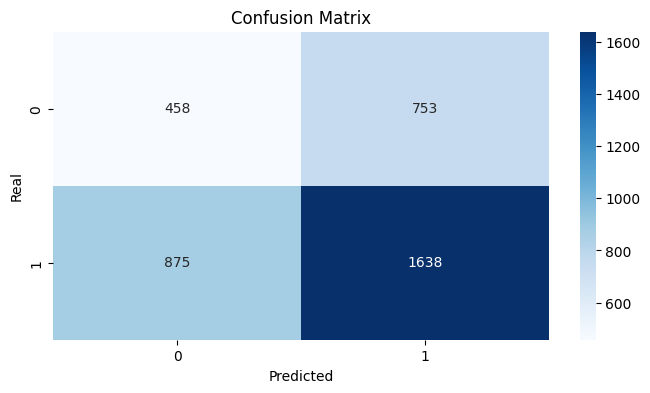

In [12]:
import model_eval
target_name = target.split(' ')[0]
model_eval.evaluation(y_test = y_test, y_pred = y_pred, name_of_classifier="RF", feature_predicted = target_name)

Random Forest Classifier implementation ( 10 - K Validation with Tuner)

In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [15]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_clf, X_test, y_test, cv=10)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


Accuracy: 0.6646079484425349
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.06      0.10      1211
           1       0.68      0.96      0.79      2513

    accuracy                           0.66      3724
   macro avg       0.54      0.51      0.45      3724
weighted avg       0.59      0.66      0.57      3724

Accuracy score and classification report successfully saved to c:\Users\48660\Desktop\Development Workshop\code\Binary classification of ratings\DT\classification_report_Valence_cross_validation.txt
Confusion matrix successfully saved to c:\Users\48660\Desktop\Development Workshop\code\Binary classification of ratings\DT\confusion_matrix_Valence_cross_validation.png


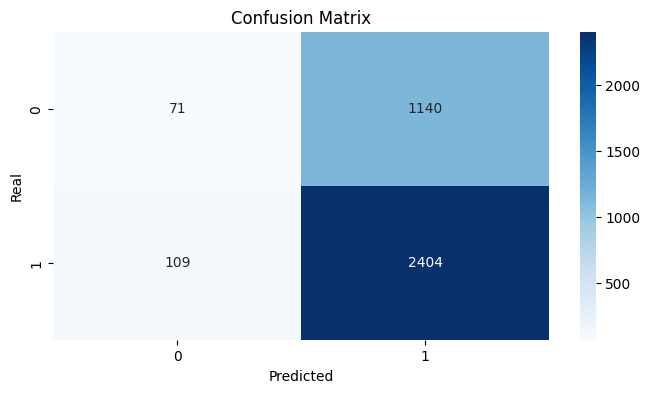

In [16]:
model_eval.evaluation(y_test = y_test, y_pred = y_pred_cv, name_of_classifier="RF", feature_predicted = target_name, cross_validation = True)

In [ ]:
target = 'Arousal behaviour'
target_name = target.split(" ")[0]

X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

Accuracy: 0.6050841389187254
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      3880
           1       0.36      0.38      0.37      1706

    accuracy                           0.61      5586
   macro avg       0.54      0.54      0.54      5586
weighted avg       0.61      0.61      0.61      5586

Confusion Matrix:


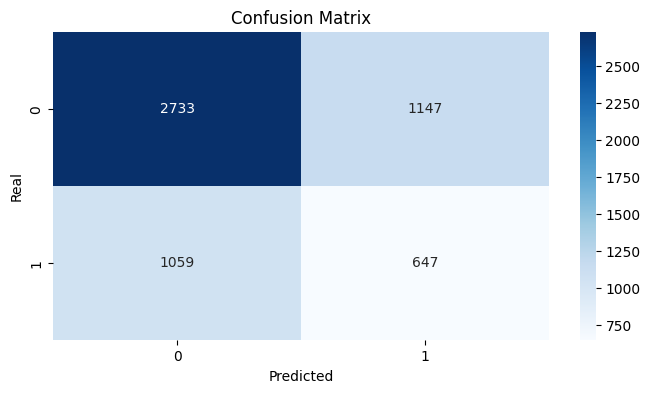

In [ ]:
# Initialize the Decision Tree Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


model_eval.evaluation(y_test = y_test, y_pred = y_pred, name_of_classifier="RF", feature_predicted = target_name)

In [ ]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_clf, X_test, y_test, cv=10)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


Accuracy: 0.6737916219119227
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.97      0.80     12819
           1       0.27      0.03      0.05      5801

    accuracy                           0.67     18620
   macro avg       0.48      0.50      0.43     18620
weighted avg       0.56      0.67      0.57     18620



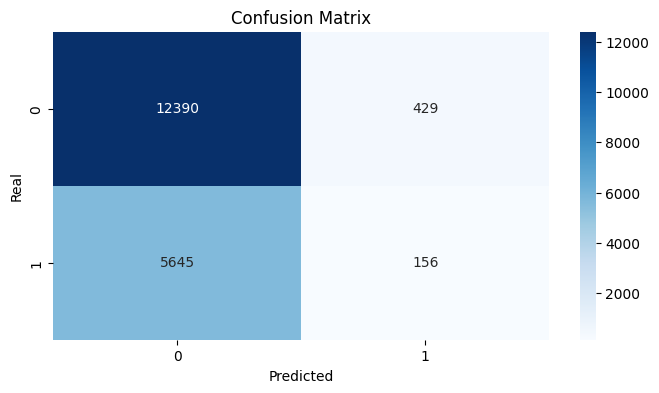

In [ ]:
model_eval.evaluation(y_test = y_test, y_pred = y_pred_cv, name_of_classifier="RF", feature_predicted = target_name, cross_validation = True)
